In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [2]:
flights = pd.read_csv('flights.csv')
flights

C:\Users\gs180\AppData\Local\Temp\ipykernel_7880\3751038646.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights_needed_data = flights.head(1000000)
flights_needed_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2015,3,7,6,OO,6396,N114SY,BOI,SFO,915,...,957.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
999996,2015,3,7,6,AA,334,N566AA,DFW,MFE,916,...,1042.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
999997,2015,3,7,6,MQ,3641,N601MQ,DSM,DFW,916,...,1131.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
999998,2015,3,7,6,OO,5244,N710SK,LAX,ASE,916,...,1242.0,26.0,0,0,NaN,26.0,0.0,0.0,0.0,0.0


In [4]:
flights_needed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1000000 non-null  int64  
 1   MONTH                1000000 non-null  int64  
 2   DAY                  1000000 non-null  int64  
 3   DAY_OF_WEEK          1000000 non-null  int64  
 4   AIRLINE              1000000 non-null  object 
 5   FLIGHT_NUMBER        1000000 non-null  int64  
 6   TAIL_NUMBER          992291 non-null   object 
 7   ORIGIN_AIRPORT       1000000 non-null  object 
 8   DESTINATION_AIRPORT  1000000 non-null  object 
 9   SCHEDULED_DEPARTURE  1000000 non-null  int64  
 10  DEPARTURE_TIME       960842 non-null   float64
 11  DEPARTURE_DELAY      960842 non-null   float64
 12  TAXI_OUT             960145 non-null   float64
 13  WHEELS_OFF           960145 non-null   float64
 14  SCHEDULED_TIME       999998 non-null   float64
 15 

In [5]:
flights_needed_data.value_counts('DIVERTED')

DIVERTED
0    997526
1      2474
dtype: int64

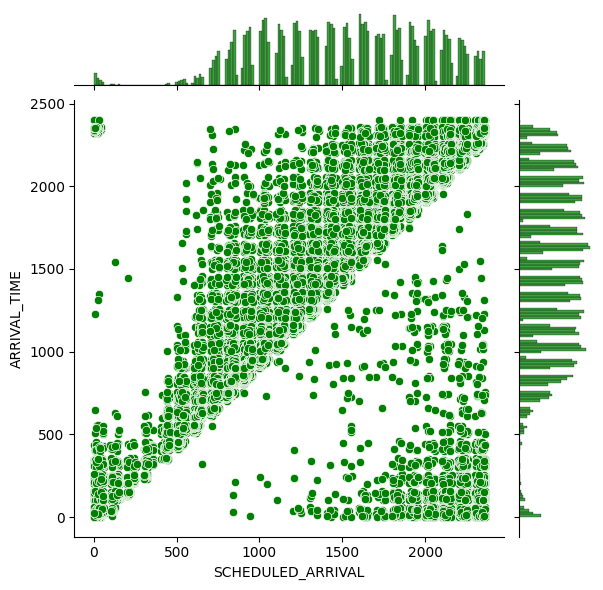

In [6]:
import seaborn as sns
sns.jointplot(data=flights_needed_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME",color='green')

C:\Users\gs180\AppData\Local\Temp\ipykernel_7880\2487094190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = flights_needed_data.corr(method='pearson')


<AxesSubplot: >

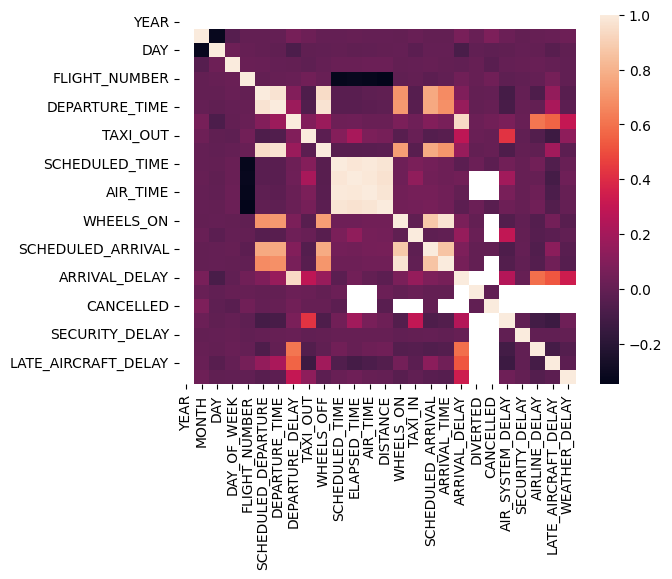

In [7]:
corr = flights_needed_data.corr(method='pearson')
sns.heatmap(corr)

In [8]:
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,-0.322440,-0.047518,-0.006326,-0.004434,0.000144,0.059183,0.028244,-0.000149,...,-0.006319,-0.006050,0.065499,0.013137,0.080883,0.020109,-0.004895,0.007116,0.010025,0.028847
DAY,NaN,-0.322440,1.000000,0.025999,0.008646,-0.006282,-0.012401,-0.078175,-0.014061,-0.011476,...,-0.001142,0.002883,-0.086199,-0.011331,-0.018477,-0.015019,-0.001333,-0.005089,-0.039801,-0.012976
DAY_OF_WEEK,NaN,-0.047518,0.025999,1.000000,0.014555,0.009160,0.002688,-0.001926,-0.019745,0.000990,...,0.006923,-0.002629,-0.007294,0.004729,-0.034625,0.000405,0.008781,0.012839,0.001874,-0.007789
FLIGHT_NUMBER,NaN,-0.006326,0.008646,0.014555,1.000000,-0.001951,0.004219,0.010967,0.042077,0.010520,...,-0.025127,-0.010593,0.036094,0.004976,0.036548,-0.020370,-0.006807,0.001711,0.052630,-0.009007
SCHEDULED_DEPARTURE,NaN,-0.004434,-0.006282,0.009160,-0.001951,1.000000,0.968471,0.098154,-0.072451,0.944531,...,0.769116,0.674797,0.085663,-0.006649,0.001928,-0.105228,0.000564,-0.070884,0.150184,-0.043075
DEPARTURE_TIME,NaN,0.000144,-0.012401,0.002688,0.004219,0.968471,1.000000,0.176621,-0.060384,0.973646,...,0.768780,0.689790,0.160838,-0.004760,0.008727,-0.091482,0.003888,-0.003299,0.214934,-0.024640
DEPARTURE_DELAY,NaN,0.059183,-0.078175,-0.001926,0.010967,0.098154,0.176621,1.000000,0.093130,0.169267,...,0.093976,0.065515,0.941303,0.023457,0.042203,0.067294,0.010841,0.611590,0.557817,0.300140
TAXI_OUT,NaN,0.028244,-0.014061,-0.019745,0.042077,-0.072451,-0.060384,0.093130,1.000000,-0.031482,...,-0.051770,-0.042903,0.280615,0.015559,0.006227,0.423669,-0.009279,-0.054380,-0.128271,0.131125
WHEELS_OFF,NaN,-0.000149,-0.011476,0.000990,0.010520,0.944531,0.973646,0.169267,-0.031482,1.000000,...,0.777384,0.707761,0.159644,-0.004276,0.005691,-0.073655,-0.002204,-0.012282,0.191785,-0.027733


pre-processing

In [9]:
flights_needed_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [10]:
flights_needed_data=flights_needed_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

In [11]:
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,3,7,BOI,SFO,915,-3.0,1013,957.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN
999996,3,7,DFW,MFE,916,3.0,1050,1042.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN
999997,3,7,DSM,DFW,916,23.0,1120,1131.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN
999998,3,7,LAX,ASE,916,-1.0,1216,1242.0,26.0,0,0,26.0,0.0,0.0,0.0,0.0


In [12]:
flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())

C:\Users\gs180\AppData\Local\Temp\ipykernel_7880\3214016927.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())


In [13]:
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,3,7,BOI,SFO,915,-3.0,1013,957.0,-16.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589
999996,3,7,DFW,MFE,916,3.0,1050,1042.0,-8.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589
999997,3,7,DSM,DFW,916,23.0,1120,1131.0,11.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589
999998,3,7,LAX,ASE,916,-1.0,1216,1242.0,26.0,0,0,26.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
result = []

In [15]:
for i in flights_needed_data['ARRIVAL_DELAY']:
    if i>15:
        result.append(1)
    else:
        result.append(0)

In [16]:
flights_needed_data['result'] = result

In [17]:
flights_needed_data.tail(10)

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
999990,3,7,ORD,GRR,915,-1.0,1101,1111.0,10.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
999991,3,7,LAS,ORD,915,92.0,1448,1609.0,81.0,0,0,1.000000,0.000000,0.000000,80.000000,0.000000,1
999992,3,7,ORD,DFW,915,-2.0,1143,1137.0,-6.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
999993,3,7,LAX,ABQ,915,-16.0,1205,1159.0,-6.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
999994,3,7,MSP,OMA,915,-4.0,1033,1020.0,-13.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
999995,3,7,BOI,SFO,915,-3.0,1013,957.0,-16.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
999996,3,7,DFW,MFE,916,3.0,1050,1042.0,-8.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
999997,3,7,DSM,DFW,916,23.0,1120,1131.0,11.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
999998,3,7,LAX,ASE,916,-1.0,1216,1242.0,26.0,0,0,26.000000,0.000000,0.000000,0.000000,0.000000,1
999999,3,7,MSP,LAX,917,-2.0,1128,1052.0,-36.0,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0


In [18]:
flights_needed_data.value_counts('result')

result
0    786767
1    213233
dtype: int64

In [19]:
flights_needed_data=flights_needed_data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights_needed_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.0,430,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
1,1,1,10,-8.0,750,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
2,1,1,20,-2.0,806,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
3,1,1,20,-5.0,805,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
4,1,1,25,-1.0,320,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,3,7,915,-3.0,1013,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
999996,3,7,916,3.0,1050,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
999997,3,7,916,23.0,1120,0,0,13.879651,0.057921,18.040721,22.955108,3.631589,0
999998,3,7,916,-1.0,1216,0,0,26.000000,0.000000,0.000000,0.000000,0.000000,1


In [20]:
from sklearn.model_selection import train_test_split
data = flights_needed_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [21]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [22]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [23]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9993034343581048